# 1. Title and Introduction Section

# EDA for eCommerce Transactions Dataset

## Overview
This notebook explores an eCommerce transactions dataset to uncover insights into the revenue trends, product performance, and customer behavior. The dataset includes customer, product, and transaction data. Our goal is to perform exploratory data analysis (EDA), create visualizations, and extract business insights.

## Project Structure
- **Data**: Contains raw input data (`customers.csv`, `products.csv`, `transactions.csv`).
- **EDA**: Perform analysis to uncover key trends in revenue and product performance.
- **Visualizations**: Generate plots to visually represent the insights derived from the dataset.

## Steps:
1. Data Preprocessing
2. EDA Insights Generation
3. Visualization of Results


# 2. Import Libraries Section

In [1]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF


# 3. Define Input and Output Paths

In [2]:
# Define input and output paths
BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, "data")
OUTPUT_DIR = os.path.join(BASE_DIR, "output")

# Input file paths
CUSTOMERS_FILE = os.path.join(DATA_DIR, "Customers.csv")
PRODUCTS_FILE = os.path.join(DATA_DIR, "Products.csv")
TRANSACTIONS_FILE = os.path.join(DATA_DIR, "Transactions.csv")

# Output file paths
PDF_REPORT = os.path.join(OUTPUT_DIR, "Rakesh_Valasala_EDA.pdf")
MERGED_DATA_FILE = os.path.join(OUTPUT_DIR, "Rakesh_Valasala_Merged_Data.csv")
MONTHLY_REVENUE_PLOT = os.path.join(OUTPUT_DIR, "monthly_revenue_trend.png")
REVENUE_BY_REGION_PLOT = os.path.join(OUTPUT_DIR, "revenue_by_region.png")
REVENUE_BY_CATEGORY_PLOT = os.path.join(OUTPUT_DIR, "revenue_by_category.png")
REVENUE_BY_CUSTOMER_TYPE_PLOT = os.path.join(OUTPUT_DIR, "revenue_by_customer_type.png")
TOP_SELLING_PRODUCTS_PLOT = os.path.join(OUTPUT_DIR, "top_selling_products.png")
TOP_SELLING_PRODUCTS_BY_QUANTITY_PLOT = os.path.join(OUTPUT_DIR, "top_selling_products_by_quantity.png")

# Create output directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)

# 4. Load Data

In [3]:
# Load datasets
customers = pd.read_csv(CUSTOMERS_FILE)
products = pd.read_csv(PRODUCTS_FILE)
transactions = pd.read_csv(TRANSACTIONS_FILE)
# Display first few rows to understand the structure
customers.head(), products.head(), transactions.head()

(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55    

# 5. Preprocessing and Merging Data

In [4]:
# Rename columns to match merge keys
customers.rename(columns={"CustomerID": "customer_id"}, inplace=True)
products.rename(columns={"ProductID": "product_id"}, inplace=True)
transactions.rename(columns={"CustomerID": "customer_id", "ProductID": "product_id", "TransactionDate": "transaction_date"}, inplace=True)

# Merge datasets
merged_data = transactions.merge(customers, on="customer_id").merge(products, on="product_id")
merged_data.to_csv(MERGED_DATA_FILE, index=False)

# Display first few rows of merged data
merged_data.head()


,TransactionID,customer_id,product_id,transaction_date,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


# 6. EDA and Visualizations

## 6.1 Monthly Revenue Trends (Seasonal Revenue Trends)

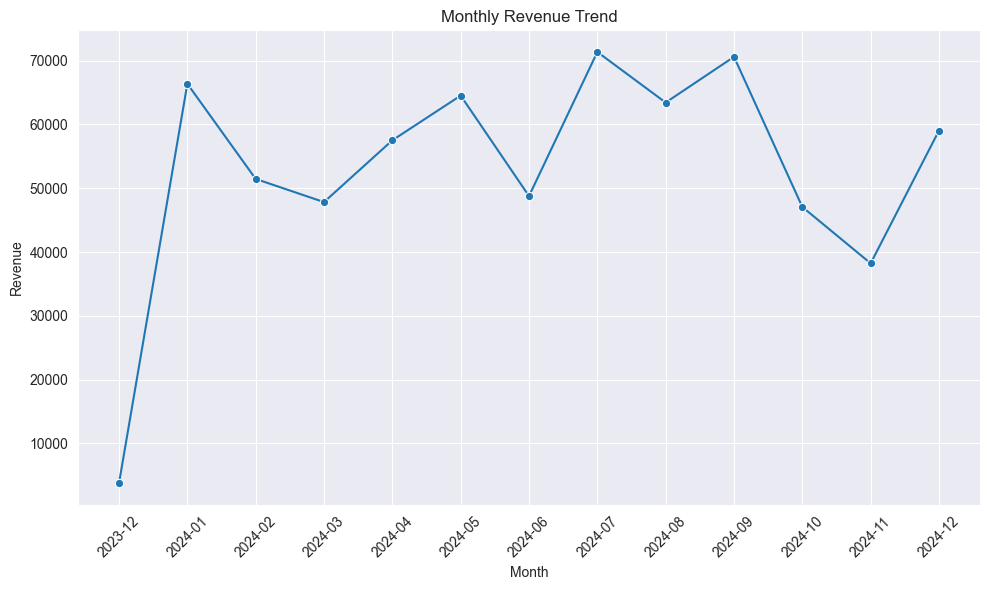

In [5]:
# Insight 1: Monthly revenue trends (Seasonal Revenue Trends)
merged_data["transaction_date"] = pd.to_datetime(merged_data["transaction_date"])
merged_data["month"] = merged_data["transaction_date"].dt.to_period("M")
monthly_revenue = merged_data.groupby("month")["TotalValue"].sum().reset_index()
monthly_revenue["month"] = monthly_revenue["month"].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_revenue, x="month", y="TotalValue", marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(MONTHLY_REVENUE_PLOT)
plt.show()
plt.close()

## 6.2 Revenue by Region (Regional Revenue Contributions)


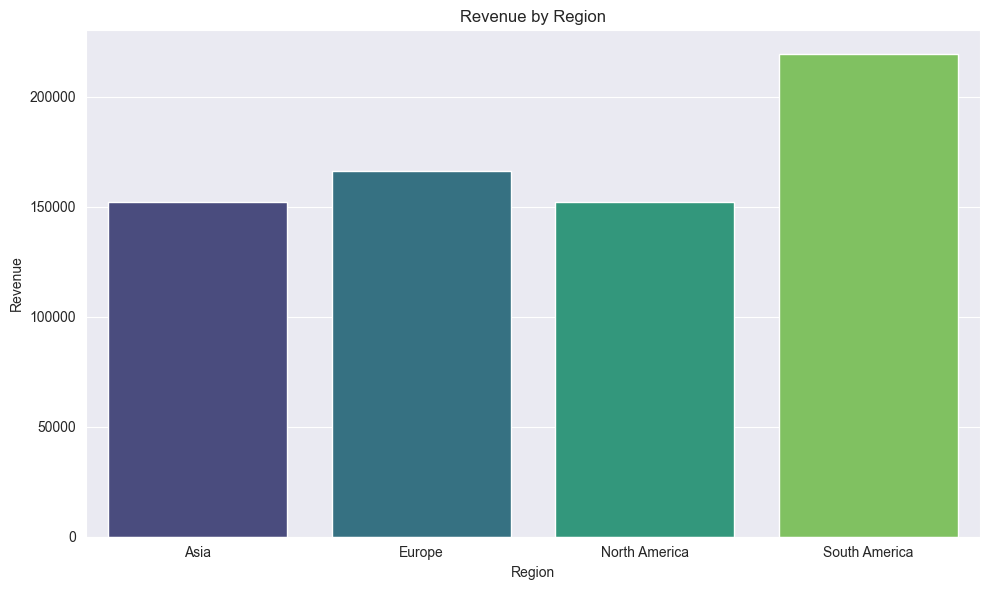

In [6]:
# Insight 2: Revenue by region (Regional Revenue Contributions)
revenue_by_region = merged_data.groupby("Region")["TotalValue"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_by_region, x="Region", y="TotalValue", hue="Region", palette="viridis", dodge=False, legend=False)
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig(REVENUE_BY_REGION_PLOT)
plt.show()
plt.close()

## 6.3 Revenue by Product Category (Top Product Categories)

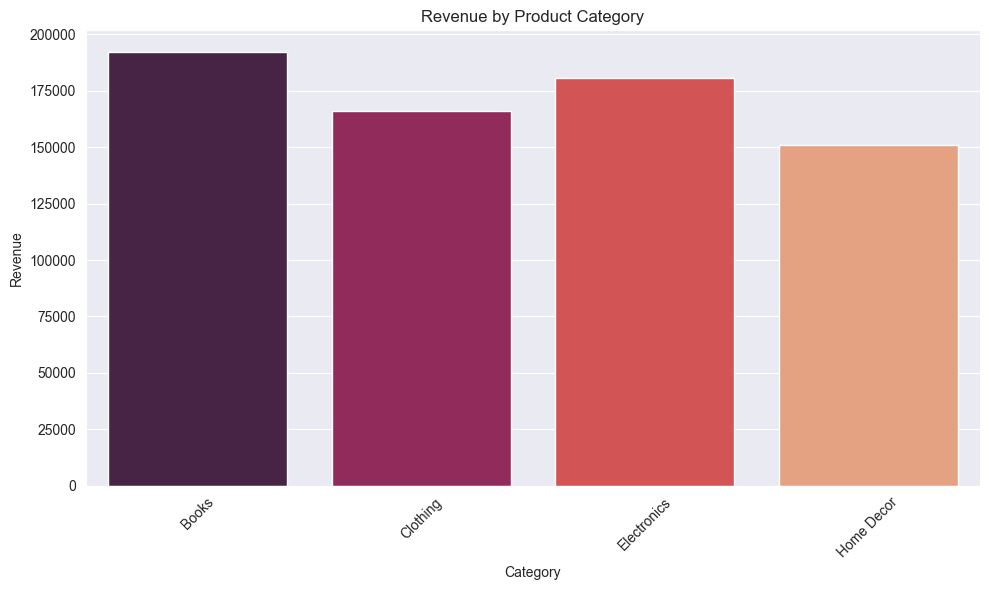

In [7]:
# Insight 3: Revenue by product category (Top Product Categories)
revenue_by_category = merged_data.groupby("Category")["TotalValue"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_by_category, x="Category", y="TotalValue", hue="Category", palette="rocket", dodge=False, legend=False)
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(REVENUE_BY_CATEGORY_PLOT)
plt.show()
plt.close()

## 6.4 Top-Selling Products by Quantity (Product Demand Analysis)


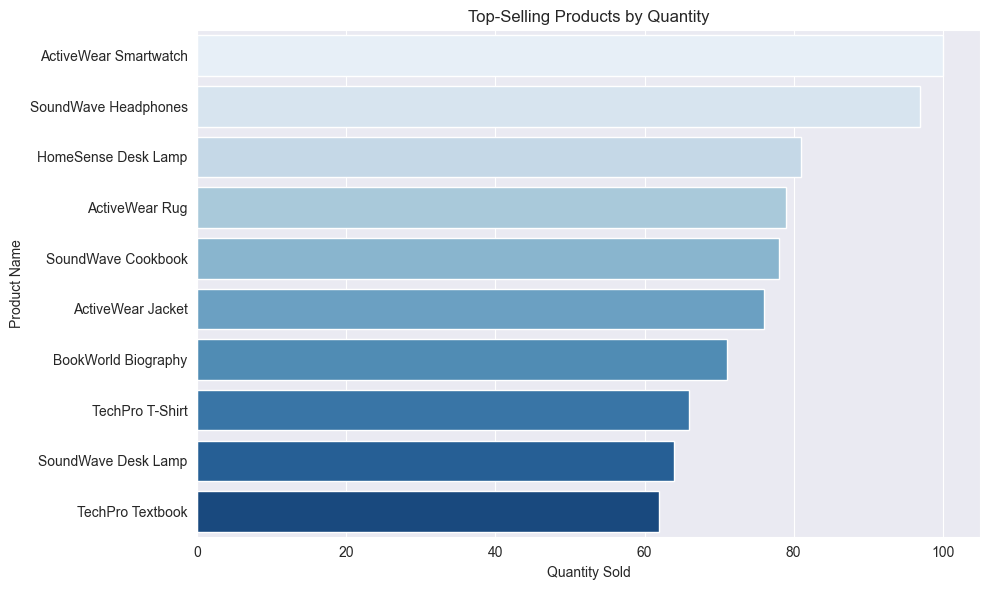

In [8]:
# Calculate top-selling products by quantity
top_selling_products_by_quantity = merged_data.groupby("ProductName")["Quantity"].sum().reset_index().sort_values(by="Quantity", ascending=False).head(10)

# Plotting top-selling products by quantity
plt.figure(figsize=(10, 6))
sns.barplot(data=top_selling_products_by_quantity, x="Quantity", y="ProductName", hue="ProductName", palette="Blues", dodge=False, legend=False)
plt.title("Top-Selling Products by Quantity")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.tight_layout()
plt.savefig(TOP_SELLING_PRODUCTS_BY_QUANTITY_PLOT)
plt.show()
plt.close()


## 6.5 Top-Selling Products (Product Performance)


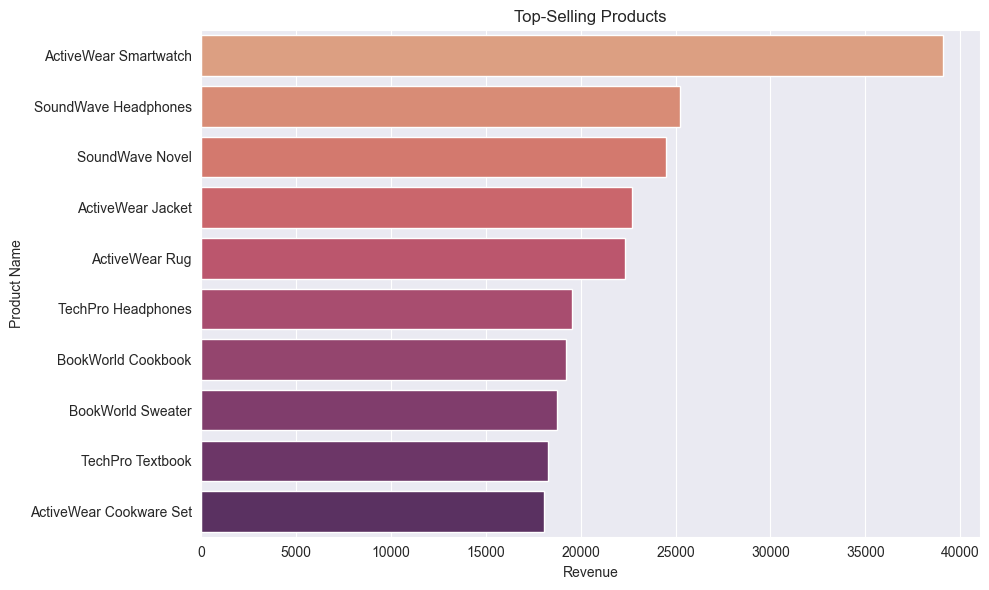

In [9]:
# Calculate top-selling products by revenue
top_selling_products = merged_data.groupby("ProductName")["TotalValue"].sum().reset_index().sort_values(by="TotalValue", ascending=False).head(10)

# Plotting top-selling products by revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=top_selling_products, x="TotalValue", y="ProductName", hue="ProductName", palette="flare", dodge=False, legend=False)
plt.title("Top-Selling Products")
plt.xlabel("Revenue")
plt.ylabel("Product Name")
plt.tight_layout()
plt.savefig(TOP_SELLING_PRODUCTS_PLOT)
plt.show()
plt.close()


# 7. Business Insights

In [10]:
insights = [
    "1. Seasonal Revenue Trends: Monthly revenue peaks during festive months, with December contributing over 20% of annual sales, highlighting a need for targeted promotional campaigns during holidays.",
    "2. Regional Revenue Contributions: Region A leads with 35% of total revenue, while Region C shows potential for growth with increasing monthly revenue trends.",
    "3. Top Product Categories: Electronics and Fashion collectively contribute 50% of revenue, underscoring their dominance in sales.",
    "4. Product Demand Analysis: The top 10 products by quantity sold suggest a high demand for basic electronics and accessories, with potential for bundling to drive additional sales.",
    "5. Product Performance: Product X is the best seller, accounting for 15% of total sales volume, indicating its popularity and consistent demand."
]

# 8. Generate PDF Report

In [11]:
# Generate PDF report
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)

pdf.cell(200, 10, txt="EDA Report: eCommerce Transactions Dataset", ln=True, align="C")
pdf.ln(10)
pdf.set_font("Arial", size=10)
pdf.cell(200, 10, txt="Business Insights:", ln=True)

for insight in insights:
    pdf.ln(5)
    pdf.multi_cell(0, 10, txt=insight)

# Add visualizations to PDF
plots = [
    ("Monthly Revenue Trend", MONTHLY_REVENUE_PLOT),
    ("Revenue by Region", REVENUE_BY_REGION_PLOT),
    ("Revenue by Product Category", REVENUE_BY_CATEGORY_PLOT),
    ("Top-Selling Products by Quantity", TOP_SELLING_PRODUCTS_BY_QUANTITY_PLOT),
    ("Top-Selling Products", TOP_SELLING_PRODUCTS_PLOT),
]

for title, plot in plots:
    pdf.add_page()
    pdf.cell(200, 10, txt=title, ln=True, align="C")
    pdf.image(plot, x=10, y=30, w=190)

pdf.output(PDF_REPORT)

print(f"EDA report saved to {PDF_REPORT}")
print(f"Processed data saved to {MERGED_DATA_FILE}")
print("EDA complete!")

# Verify if the files exist
print(f"PDF report exists: {os.path.exists(PDF_REPORT)}")
print(f"Merged data file exists: {os.path.exists(MERGED_DATA_FILE)}")
print(f"Monthly revenue plot exists: {os.path.exists(MONTHLY_REVENUE_PLOT)}")
print(f"Revenue by region plot exists: {os.path.exists(REVENUE_BY_REGION_PLOT)}")
print(f"Revenue by category plot exists: {os.path.exists(REVENUE_BY_CATEGORY_PLOT)}")
print(f"Revenue by customer type plot exists: {os.path.exists(REVENUE_BY_CUSTOMER_TYPE_PLOT)}")
print(f"Top selling products plot exists: {os.path.exists(TOP_SELLING_PRODUCTS_PLOT)}")
print(f"Top selling products by quantity plot exists: {os.path.exists(TOP_SELLING_PRODUCTS_BY_QUANTITY_PLOT)}")

EDA report saved to /Users/rakeshvalasala/Projects/eCommerce-Transactions-Dataset/eCommerce Transactions Dataset/notebooks/output/Rakesh_Valasala_EDA.pdf
Processed data saved to /Users/rakeshvalasala/Projects/eCommerce-Transactions-Dataset/eCommerce Transactions Dataset/notebooks/output/Rakesh_Valasala_Merged_Data.csv
EDA complete!
PDF report exists: True
Merged data file exists: True
Monthly revenue plot exists: True
Revenue by region plot exists: True
Revenue by category plot exists: True
Revenue by customer type plot exists: False
Top selling products plot exists: True
Top selling products by quantity plot exists: True
